# CGDP Feature Cleaning

## initial import and setup of Chinese GDP

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [8]:
df = pd.read_csv("../../raw_data/data/CGDP/ECONOMICS_CNGDP, M UNIX.csv")
df.head()

,time,open,high,low,close,Volume,Volume MA
0,-286675200,5.972000e+10,5.972000e+10,5.972000e+10,5.972000e+10,NaN,NaN
1,-255139200,5.006000e+10,5.006000e+10,5.006000e+10,5.006000e+10,NaN,NaN
2,-223603200,4.721000e+10,4.721000e+10,4.721000e+10,4.721000e+10,NaN,NaN
3,-192067200,5.071000e+10,5.071000e+10,5.071000e+10,5.071000e+10,NaN,NaN
4,-160444800,5.971000e+10,5.971000e+10,5.971000e+10,5.971000e+10,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       62 non-null     int64  
 1   open       62 non-null     float64
 2   high       62 non-null     float64
 3   low        62 non-null     float64
 4   close      62 non-null     float64
 5   Volume     0 non-null      float64
 6   Volume MA  0 non-null      float64
dtypes: float64(6), int64(1)
memory usage: 3.5 KB


In [10]:
df['time'] = pd.to_datetime(df['time'], unit='s', origin="unix")

In [11]:
df = df.set_index(["time"])

In [12]:
df = df[df.index>"1993-12-01"]

In [13]:
df = df[["close"]]

In [14]:
df

,close
time,
1994-12-01,5.643200e+11
1995-12-01,7.345500e+11
1996-12-01,8.637500e+11
1997-12-01,9.616000e+11
1998-12-01,1.029040e+12
1999-12-01,1.094000e+12
2000-12-01,1.211350e+12
2001-12-01,1.339400e+12
2002-12-01,1.470550e+12


<AxesSubplot: xlabel='time'>

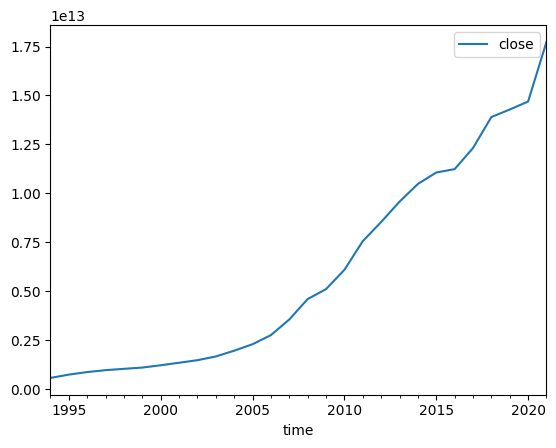

In [15]:
df.plot()

## Chinese GDP Daily Interpolation

In [16]:
len(df)

28

In [67]:
datetime_index = pd.date_range(start="1994-12-01", end="2021-12-01", name="Date")
len(datetime_index)

9863

In [68]:
cgdp_df = pd.DataFrame(index=datetime_index)

In [69]:
cgdp_df["cgdp"] = df["close"]

In [70]:
cgdp_df

,cgdp
Date,
1994-12-01,5.643200e+11
1994-12-02,NaN
1994-12-03,NaN
1994-12-04,NaN
1994-12-05,NaN
...,...
2021-11-27,NaN
2021-11-28,NaN
2021-11-29,NaN


In [71]:
cgdp_df.interpolate(method="linear", inplace=True)

In [72]:
cgdp_df.head(3)

,cgdp
Date,
1994-12-01,5.643200e+11
1994-12-02,5.647864e+11
1994-12-03,5.652528e+11


# Merge Chinese GDP to BDI Dataframe

In [73]:
bdi_df = pd.read_csv("../../raw_data/data/BDI/interpolated_daily_BDI.csv")

In [74]:
bdi_df

,Date,Price
0,1995-01-03,1964.0
1,1995-01-04,1961.0
2,1995-01-05,1967.0
3,1995-01-06,1983.0
4,1995-01-09,1994.0
...,...,...
7061,2022-11-08,1321.8
7062,2022-11-09,1288.6
7063,2022-11-10,1255.4
7064,2022-11-11,1222.2


In [75]:
bdi_df = bdi_df.set_index("Date")

In [76]:
bdi_df

,Price
Date,
1995-01-03,1964.0
1995-01-04,1961.0
1995-01-05,1967.0
1995-01-06,1983.0
1995-01-09,1994.0
...,...
2022-11-08,1321.8
2022-11-09,1288.6
2022-11-10,1255.4


In [77]:
cgdp_df[cgdp_df["cgdp"].index > "1995-01-15"]

,cgdp
Date,
1995-01-16,5.857736e+11
1995-01-17,5.862400e+11
1995-01-18,5.867064e+11
1995-01-19,5.871728e+11
1995-01-20,5.876392e+11
...,...
2021-11-27,1.770067e+13
2021-11-28,1.770902e+13
2021-11-29,1.771737e+13


In [78]:
bdi_df.index = pd.to_datetime(bdi_df.index)

In [79]:
bdi_df.index

DatetimeIndex(['1995-01-03', '1995-01-04', '1995-01-05', '1995-01-06',
               '1995-01-09', '1995-01-10', '1995-01-11', '1995-01-12',
               '1995-01-13', '1995-01-16',
               ...
               '2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04',
               '2022-11-07', '2022-11-08', '2022-11-09', '2022-11-10',
               '2022-11-11', '2022-11-14'],
              dtype='datetime64[ns]', name='Date', length=7066, freq=None)

In [80]:
cgdp_df

,cgdp
Date,
1994-12-01,5.643200e+11
1994-12-02,5.647864e+11
1994-12-03,5.652528e+11
1994-12-04,5.657192e+11
1994-12-05,5.661855e+11
...,...
2021-11-27,1.770067e+13
2021-11-28,1.770902e+13
2021-11-29,1.771737e+13


In [81]:
#Combine bdi_df to cngdp_df:

combined_df = pd.merge(bdi_df, cgdp_df, on="Date", how="inner")

In [82]:
combined_df

,Price,cgdp
Date,,
1995-01-03,1964.0,5.797107e+11
1995-01-04,1961.0,5.801770e+11
1995-01-05,1967.0,5.806434e+11
1995-01-06,1983.0,5.811098e+11
1995-01-09,1994.0,5.825090e+11
...,...,...
2021-11-25,3009.4,1.768398e+13
2021-11-26,3090.2,1.769233e+13
2021-11-29,3171.0,1.771737e+13


<AxesSubplot: xlabel='Date'>

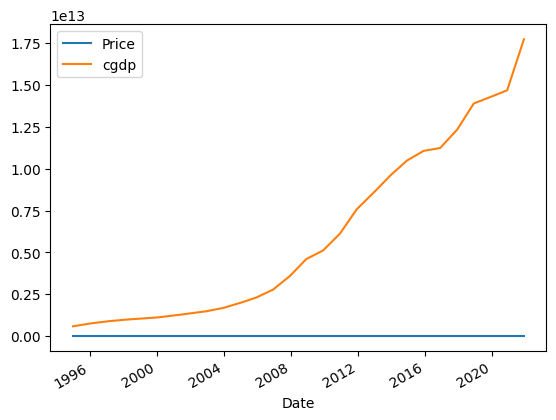

In [83]:
combined_df.plot()

<AxesSubplot: xlabel='time'>

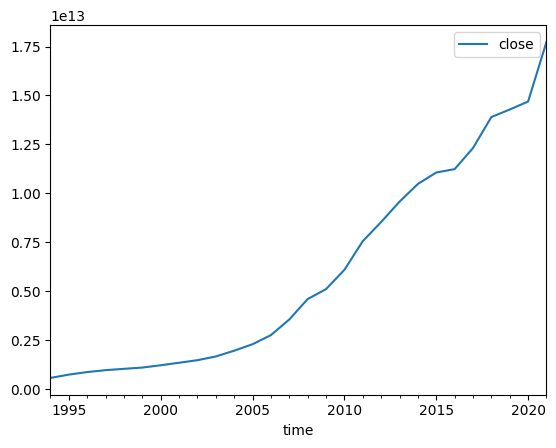

In [84]:
df.plot()

In [85]:
combined_df["cgdp"][1]

580177041095.8904

In [86]:
len(combined_df)

6818

## Adding Growth Rate of CNGDP per week

Lots of feature generation is possible as growth rate is of course dependent on start and end time-frame. For now, I will simply create the growth rate per week, then per month, and then potentially per year.

In [87]:
combined_df["diff"] = combined_df["cgdp"].diff()

In [88]:
combined_df.head()

,Price,cgdp,diff
Date,,,
1995-01-03,1964.0,5.797107e+11,NaN
1995-01-04,1961.0,5.801770e+11,4.663836e+08
1995-01-05,1967.0,5.806434e+11,4.663836e+08
1995-01-06,1983.0,5.811098e+11,4.663836e+08
1995-01-09,1994.0,5.825090e+11,1.399151e+09


In [89]:
combined_df.shape

(6818, 3)

In [90]:
combined_df["cgdp_growth"] = combined_df["diff"]/combined_df["cgdp"]

In [91]:
combined_df.head()

,Price,cgdp,diff,cgdp_growth
Date,,,,
1995-01-03,1964.0,5.797107e+11,NaN,NaN
1995-01-04,1961.0,5.801770e+11,4.663836e+08,0.000804
1995-01-05,1967.0,5.806434e+11,4.663836e+08,0.000803
1995-01-06,1983.0,5.811098e+11,4.663836e+08,0.000803
1995-01-09,1994.0,5.825090e+11,1.399151e+09,0.002402


In [92]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6818 entries, 1995-01-03 to 2021-12-01
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        6818 non-null   float64
 1   cgdp         6818 non-null   float64
 2   diff         6817 non-null   float64
 3   cgdp_growth  6817 non-null   float64
dtypes: float64(4)
memory usage: 266.3 KB


In [95]:
combined_df.to_csv("../../raw_data/data/CGDP/cleaned_daily_CGDP.csv")